In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import os

In [2]:
#Walk through the libraries
os.listdir()

['data',
 'WISDM_ar_v1.1',
 '.ipynb_checkpoints',
 'Activity_Change_Detection.ipynb']

In [3]:
#Reading the CSV file.

df = pd.read_csv('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', error_bad_lines=False, header=None)

In [4]:
#Getting rid of user id.

df = df.iloc[:,1:]

In [5]:
df.shape

(1098209, 5)

In [6]:
#Setting column names

df.columns = (['Activity', 'Timestamp', 'x-acc', 'y-acc', 'z-acc'])

In [7]:
df.head()

,Activity,Timestamp,x-acc,y-acc,z-acc
0,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,Jogging,49106062271000,5.012288,11.264028,0.953424
2,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [8]:
df.describe()

,Timestamp,x-acc,y-acc,z-acc
count,1.098209e+06,1.098209e+06,1.098209e+06,1.098208e+06
mean,3.340892e+13,6.628694e-01,7.255624e+00,4.110784e-01
std,4.944961e+13,6.849044e+00,6.746214e+00,4.754120e+00
min,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,2.019102e+12,-2.870000e+00,3.170000e+00,-2.220000e+00
50%,9.722652e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,4.996557e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [9]:
activities = ['Sitting','Walking','Standing','Upstairs','Downstairs','Jogging']
axes = ['x-acc', 'y-acc', 'z-acc']

In [10]:
import matplotlib.pyplot as plt

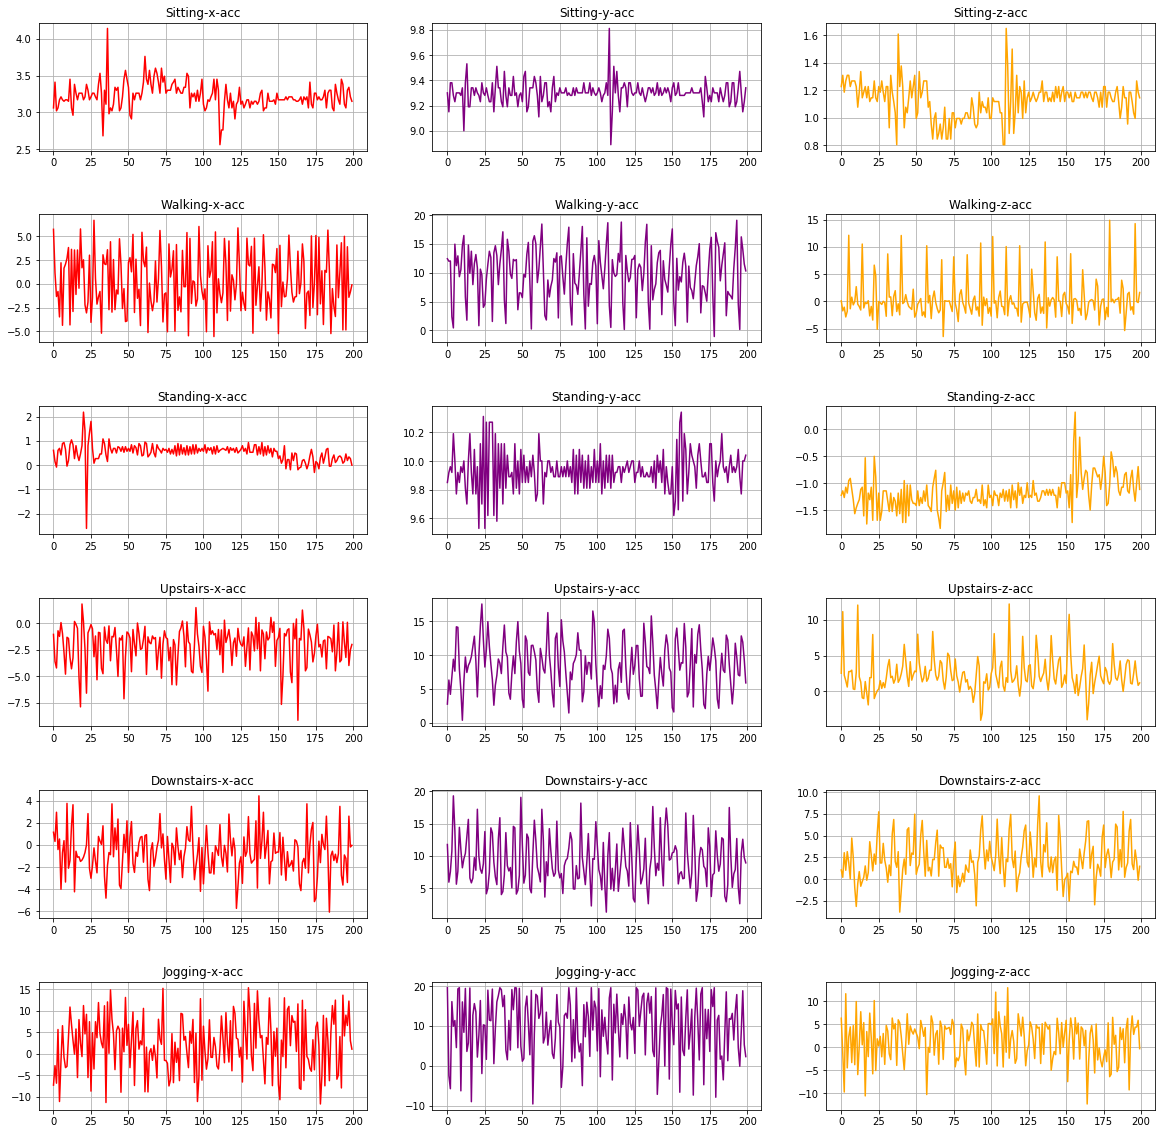

In [37]:
#Plot acceleration in each axis for each activity

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5)

colors = ['red', 'purple', 'orange']

for i in range(len(activities)):
    
    
    for j in range(3):
        plt.subplot(6,3,3*i+j+1)
        plot_data = df.loc[df['Activity'] == activities[i]][axes[j]][800:1000].values.reshape(-1,1)
        plt.plot(plot_data, color=colors[j])
        plt.grid()
        plt.title(activities[i] + "-" + axes[j])
        

In [33]:
#Drop NaNs

df = df.dropna()

In [38]:
#Replace activities with numbers

work = df.replace(activities, [0,1,2,3,4,5])

In [61]:
a = np.random.rand(20,1)
stats.mode(a)[0][0][0]

0.005880525124075775

In [50]:
#For calculating mode.

from scipy import stats

In [71]:
#Create overlapping time windows with some stride.

window_size = 200
stride = 20

windows = []
labels = []

for i in range(0, len(work)-window_size, stride):
    xs = work['x-acc'][i:i+window_size].values
    ys = work['y-acc'][i:i+window_size].values
    zs = work['z-acc'][i:i+window_size].values
    label = stats.mode(work['Activity'][i:i+window_size].values)[0][0]
    windows.append([xs, ys, zs])
    labels.append([label])

In [83]:
#Reshaping from (x, 3, 200) to (x, 200, 3)
X = np.array(windows).reshape(54901, 200, 3)
windows.shape

(54901, 200, 3)

In [113]:
y = np.array(labels).reshape(-1)
y.shape

(54901,)

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [116]:
# from keras.models import Sequential
from tensorflow import keras

In [117]:
model = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(200,3), activation='tanh'),
    keras.layers.Dense(6, activation='softmax')
])

In [120]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [121]:
model.fit(X_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
97/97 [==============================] - 29s 302ms/step - loss: 1.0277 - accuracy: 0.6204
Epoch 2/10
97/97 [==============================] - 30s 306ms/step - loss: 0.5842 - accuracy: 0.7997
Epoch 3/10
97/97 [==============================] - 30s 310ms/step - loss: 0.5203 - accuracy: 0.8188
Epoch 4/10
97/97 [==============================] - 31s 321ms/step - loss: 0.4474 - accuracy: 0.8406
Epoch 5/10
97/97 [==============================] - 32s 330ms/step - loss: 0.4534 - accuracy: 0.8406
Epoch 6/10
97/97 [==============================] - 34s 352ms/step - loss: 0.4062 - accuracy: 0.8573
Epoch 7/10
97/97 [==============================] - 35s 357ms/step - loss: 0.4548 - accuracy: 0.8385
Epoch 8/10
97/97 [==============================] - 43s 440ms/step - loss: 0.3896 - accuracy: 0.8597
Epoch 9/10
97/97 [==============================] - 38s 388ms/step - loss: 0.4308 - accuracy: 0.8454
Epoch 10/10
97/97 [==============================] - 40s 417ms/step - loss: 0.3714 - accura

In [122]:
test_loss, accuracy = model.evaluate(X_test, y_test)
test_loss, accuracy

172/172 [==============================] - 3s 18ms/step - loss: 0.3493 - accuracy: 0.8718


(0.34928518533706665, 0.8717902302742004)